## НИР ТМО
### ИУ5-65Б Большаков Г.Н.

In [19]:
import sys
sys.path.append('..')
from custom_lib import lib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils.validation import check_is_fitted
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import NotFittedError
from sklearn.metrics import  mean_absolute_error, median_absolute_error, r2_score, root_mean_squared_error
%matplotlib inline 
sns.set(style="ticks")

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [20]:
data = pd.read_csv('HousingData.csv', sep=',')

In [21]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [23]:
data.shape

(506, 14)

In [24]:
data = data.drop_duplicates()

In [25]:
data.shape

(506, 14)

In [26]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Колонка CRIM. Тип данных float64. Количество пустых значений 20, 3.95%.


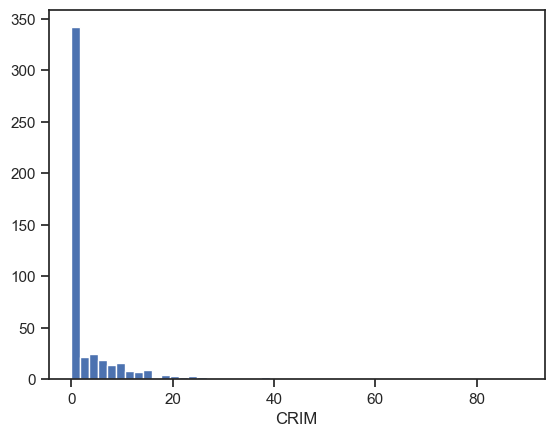

Колонка ZN. Тип данных float64. Количество пустых значений 20, 3.95%.


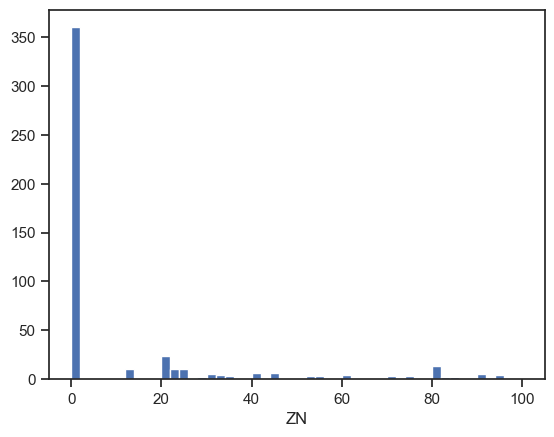

Колонка INDUS. Тип данных float64. Количество пустых значений 20, 3.95%.


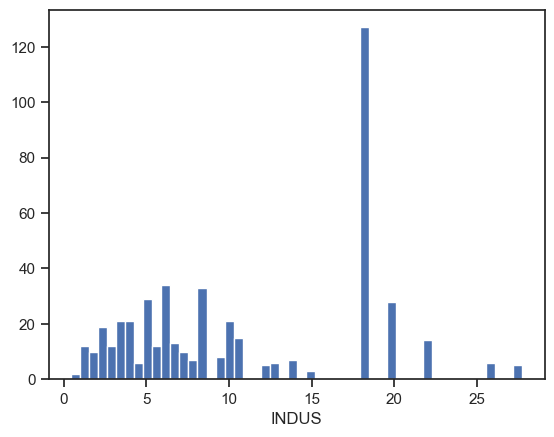

Колонка CHAS. Тип данных float64. Количество пустых значений 20, 3.95%.


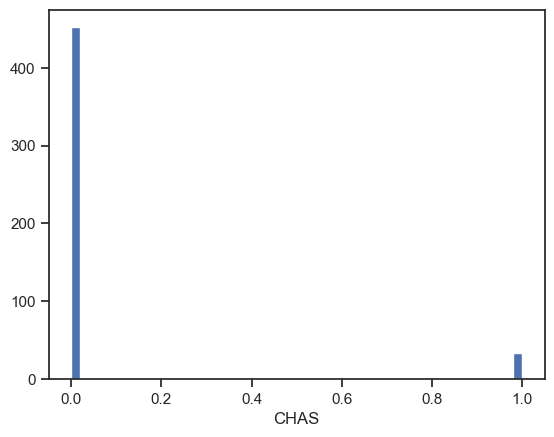

Колонка AGE. Тип данных float64. Количество пустых значений 20, 3.95%.


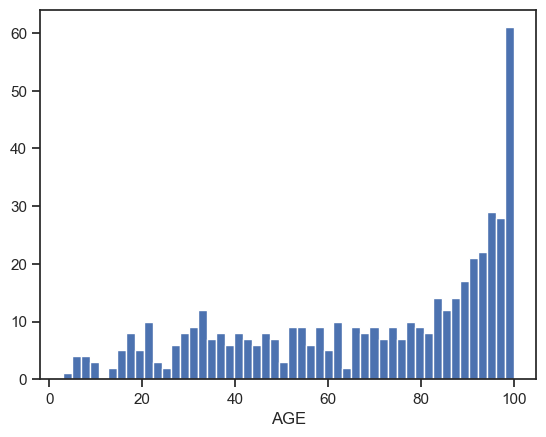

Колонка LSTAT. Тип данных float64. Количество пустых значений 20, 3.95%.


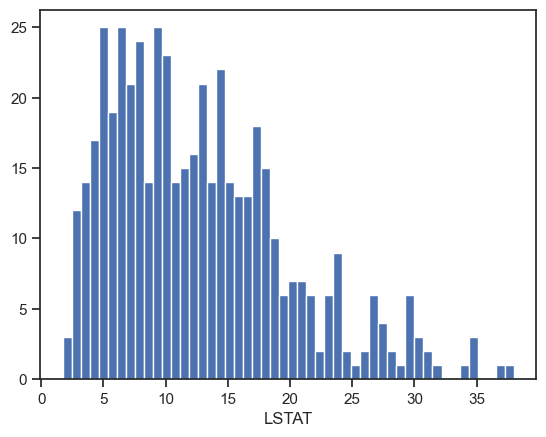

In [27]:
null_cols = []
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        null_cols.append(col)
        temp_perc = round((temp_null_count / data.shape[0]) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(
            col, dt, temp_null_count, temp_perc))
        plt.hist(data[col], 50)
        plt.xlabel(col)
        plt.show()

In [28]:
def random_forest_impute(data, column, is_classification=False):
    df = data.copy()
    
    known = df[df[column].notna()]
    unknown = df[df[column].isna()]
    
    if unknown.empty:
        return df
    
    X_known = known.drop(column, axis=1)
    y_known = known[column]
    
    X_unknown = unknown.drop(column, axis=1)
    
    if is_classification:
        model = RandomForestClassifier()
    else:
        model = RandomForestRegressor()
    
    model.fit(X_known, y_known)
    
    predicted_values = model.predict(X_unknown)
    
    df.loc[df[column].isna(), column] = predicted_values
    
    return df

data_imputed = data.copy()
for col in null_cols:
    if data_imputed[col].dtype == 'object' or len(data_imputed[col].unique()) <= 20:
        data_imputed = random_forest_impute(data_imputed, col, is_classification=True)
    else:
        data_imputed = random_forest_impute(data_imputed, col, is_classification=False)

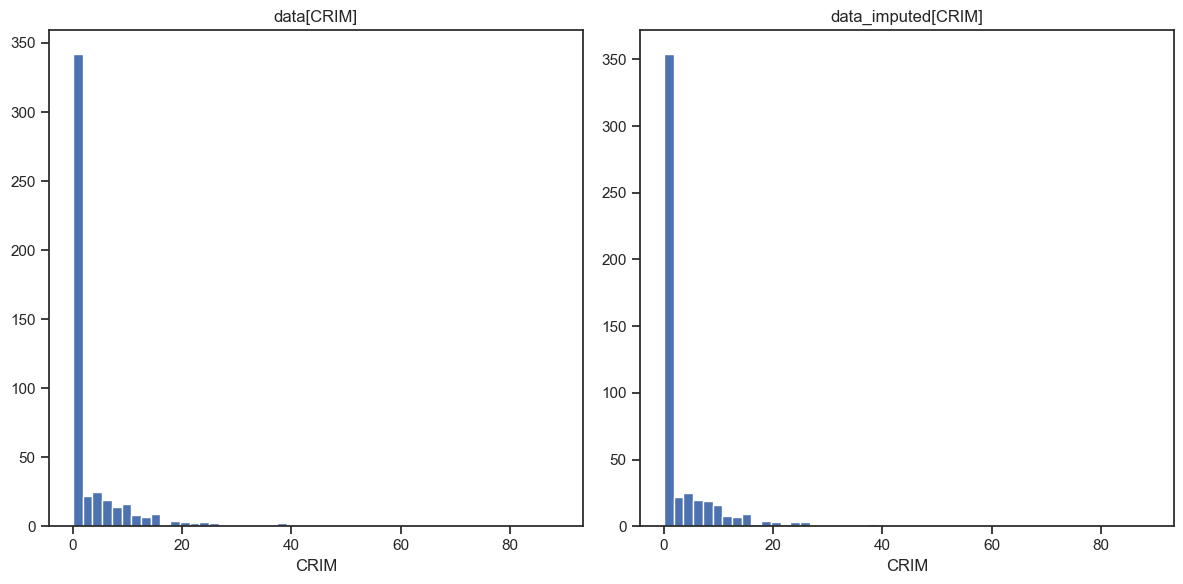

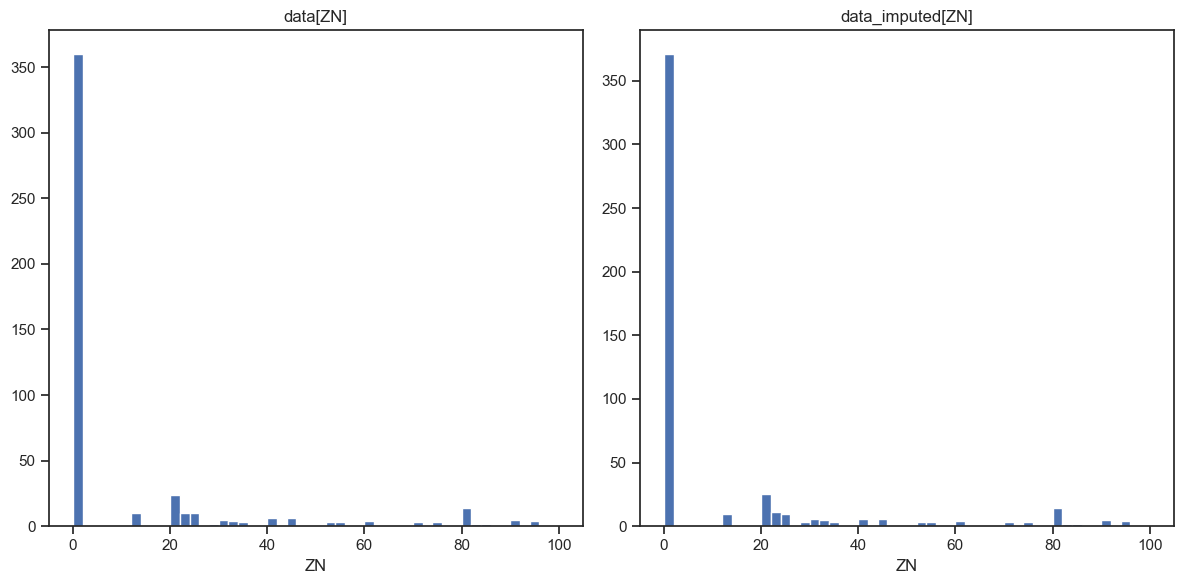

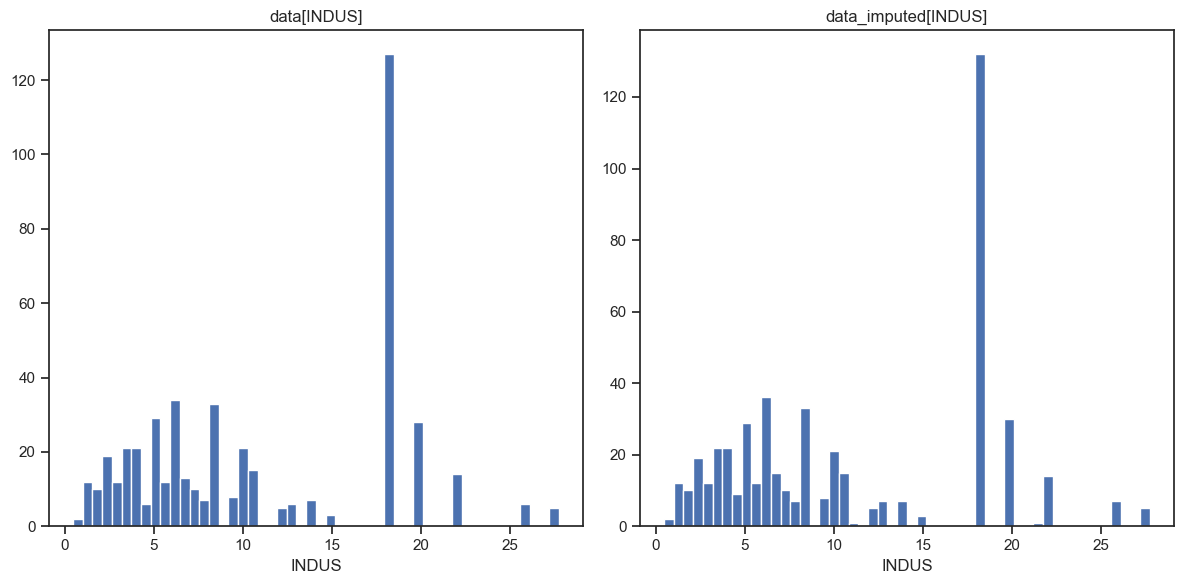

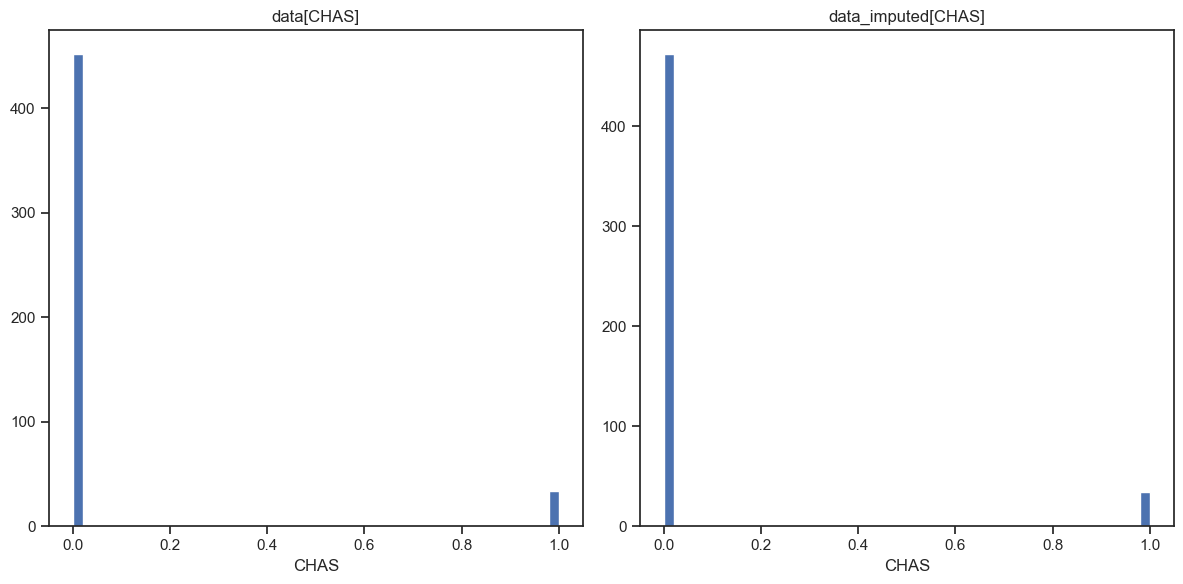

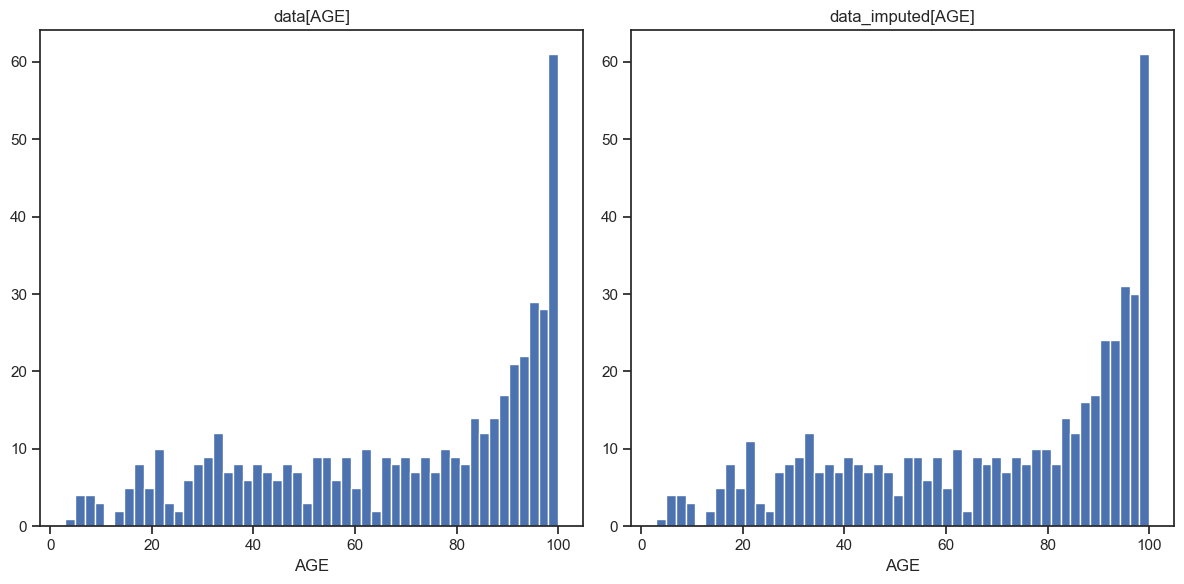

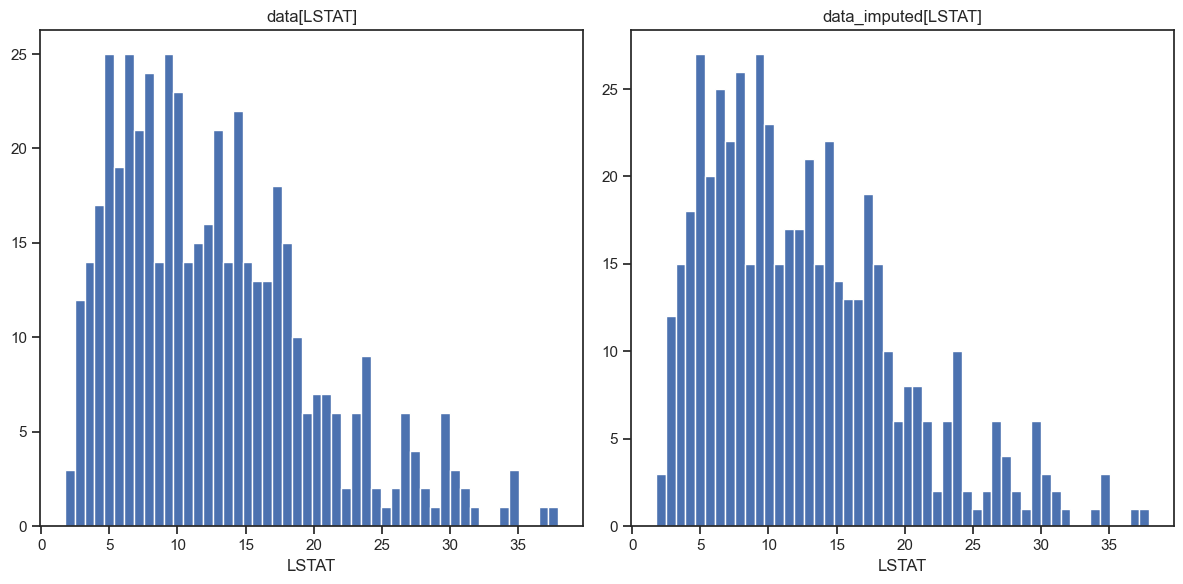

In [29]:
for col in null_cols:    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    axs[0].hist(data[col], bins=50)
    axs[0].set_xlabel(col)
    axs[0].set_title(f'data[{col}]')
    
    axs[1].hist(data_imputed[col], bins=50)
    axs[1].set_xlabel(col)
    axs[1].set_title(f'data_imputed[{col}]')
    
    plt.tight_layout()
    plt.show()

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

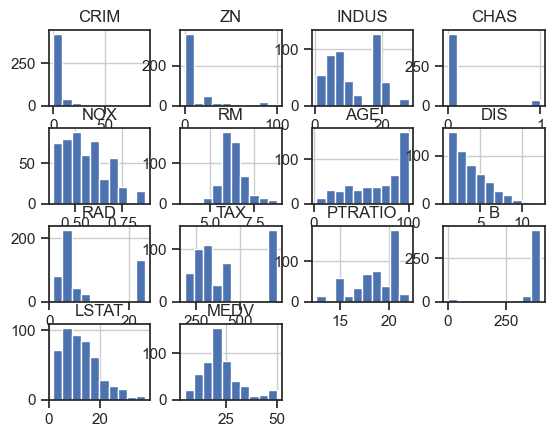

In [30]:
data.hist()

In [31]:
data_X = data_imputed.drop(columns='MEDV')
data_y = data_imputed['MEDV']

In [32]:
scaler = StandardScaler()

data_X_std = scaler.fit_transform(data_X)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data_X_std, data_y, test_size=0.2, random_state=1)

In [34]:
svr = SVR()
svr.fit(X_train, y_train)
lib.test_model(svr, X_test=X_test, y_test=y_test)

SVR()
mean_absolute_error: 3.50336176963122
median_absolute_error: 2.0951677289462802
root_mean_squared_error: 5.851343546064329
r2_score: 0.6535553404859513
---------------------------------------


In [35]:
param_grid = {
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'C':[1e-3, 1e-2, 10, 1e2, 1e3]
}

grid_search = GridSearchCV(SVR(), param_grid, cv=5)
grid_search.fit(data_X, data_y)
grid_search.best_params_

{'C': 10, 'kernel': 'linear'}

In [36]:
svr_1 = SVR(kernel=grid_search.best_params_['kernel'], C=grid_search.best_params_['C'])
svr_1.fit(X_train, y_train)
lib.test_model(svr_1, X_test=X_test, y_test=y_test)

SVR(C=10, kernel='linear')
mean_absolute_error: 3.415506701158947
median_absolute_error: 2.45886485019758
root_mean_squared_error: 4.802258000318378
r2_score: 0.7666468574518857
---------------------------------------


In [37]:
gb_reg = GradientBoostingRegressor(random_state=1)
gb_reg.fit(X_train, y_train)
lib.test_model(gb_reg, X_test=X_test, y_test=y_test)

GradientBoostingRegressor(random_state=1)
mean_absolute_error: 2.2020717901817894
median_absolute_error: 1.7439241482333294
root_mean_squared_error: 3.070265213475842
r2_score: 0.9046162351140319
---------------------------------------


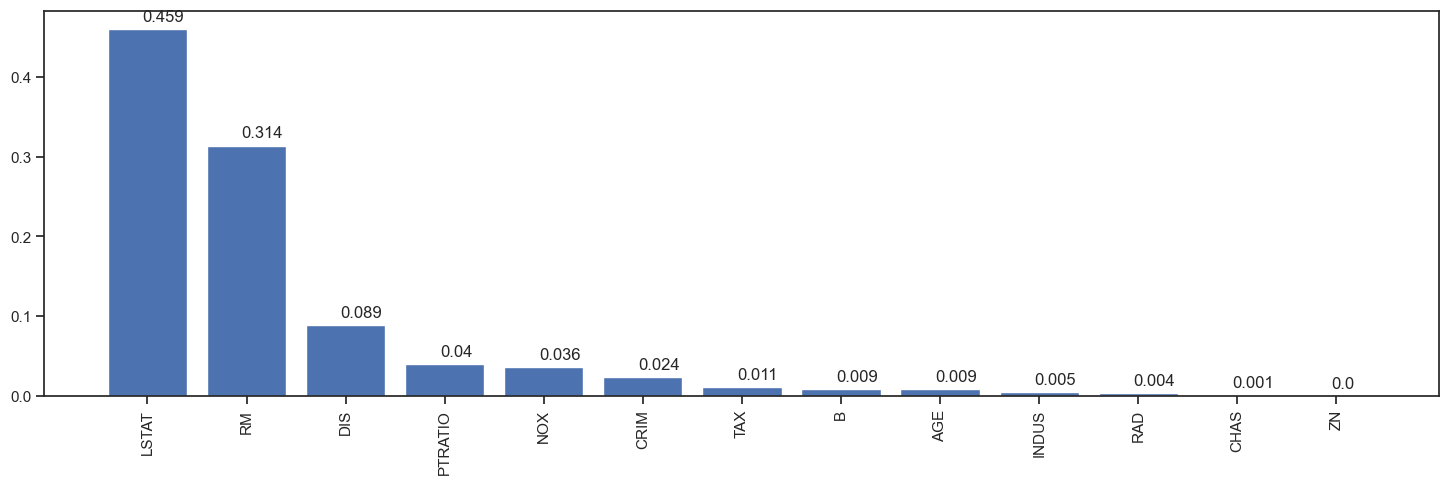

In [38]:
_,_ = lib.draw_feature_importances(gb_reg, data_X)

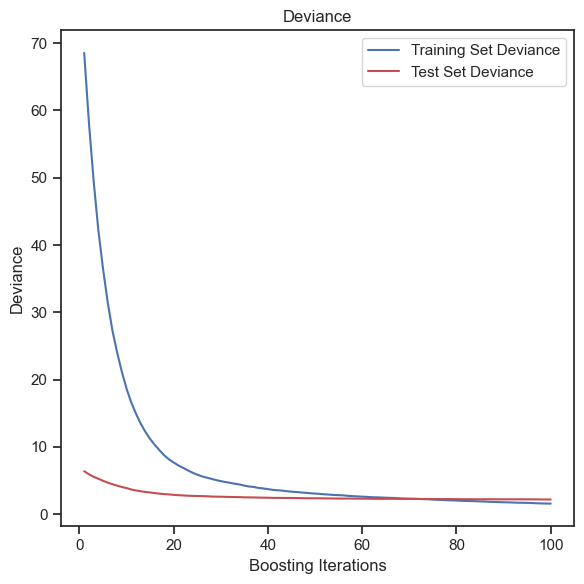

In [39]:
test_score = np.zeros((100,), dtype=np.float64)
for i, y_pred in enumerate(gb_reg.staged_predict(X_test)):
    test_score[i] = mean_absolute_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(100) + 1,
    gb_reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(100) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [40]:
for model in [gb_reg, svr_1]:
    lib.test_model(model, X_test=X_train, y_test=y_train)

GradientBoostingRegressor(random_state=1)
mean_absolute_error: 0.987490493685567
median_absolute_error: 0.7711751976064534
root_mean_squared_error: 1.2578671434362398
r2_score: 0.9804134361866202
---------------------------------------
SVR(C=10, kernel='linear')
mean_absolute_error: 2.992704640721791
median_absolute_error: 1.8875758880379205
root_mean_squared_error: 4.984320218068593
r2_score: 0.6924607313562612
---------------------------------------


In [41]:
for model in [gb_reg, svr_1]:
    lib.test_model(model, X_test=X_test, y_test=y_test)

GradientBoostingRegressor(random_state=1)
mean_absolute_error: 2.2020717901817894
median_absolute_error: 1.7439241482333294
root_mean_squared_error: 3.070265213475842
r2_score: 0.9046162351140319
---------------------------------------
SVR(C=10, kernel='linear')
mean_absolute_error: 3.415506701158947
median_absolute_error: 2.45886485019758
root_mean_squared_error: 4.802258000318378
r2_score: 0.7666468574518857
---------------------------------------
